# Brownian Motion

(continuous or quasi-continuous definition)

1.) $B_0=0$

2.) $B$ has stationary and indepent increments

3.) $B_t-B_s\sim N(0,t-s)$ with $0<s<t$

(Discrete sense)

Suppose we had time increments $0=t_0<t_1<\dots <t_k=T$
- $B_{t_0}=B_0=0$
- $B_{t_1}=B_0+B_{t_1}-B_{t_0}$
- $B_{t_2}=B_{t_0}+B_{t_2}-B_{t_1}$
- (generally) $B_{t_i}=B_{t_{i-1}}+B_{t_i}-B_{t_{i-1}}, i \in \mathbb{N}$

Suppose we had a standard normal viarable $Z\sim N(0,1)$ and first index of a Brownian motion given by $B_{t_1}=B_0+B_{t_1}-B_{t_0}=0+B_{t_1}-B_{t_0}\sim N(0,t_1)$
If we are to scale $Z$ by $\sqrt{t_1}$ it follows $B_{t_1}=\sqrt{t_1}Z$ in the sense that have the same distribution function.

We know that any shift/scale (by some constants $a,b\in\mathbb{R}$ normal random variable is also normal, thus we can look for the expectation and varaince...

- $\mathbb{E}(\sqrt{t_1}Z)=\sqrt{t_1}\mathbb{E}(Z)=0$
- $Var(\sqrt{t_1}Z)=t_1Var(Z)=t_1$
$\implies \sqrt{t_1}Z \sim N(0,t_1) \implies \sqrt{t_1}Z_{t_1}=B_{t_1}$

Simulation Brownian motions
- $B_{t_0}=B_0=0$
- $B_{t_1}=\sqrt{t_1}Z_{t_1}$
- $B_{t_2}=\sqrt{t_1}Z_{t_1}+\sqrt{t_2-t_1}Z_{t_2}$
- $B_{t_i}=B_{t_{i-2}}+B_{t_i}-B_{t_{i-1}}=\Sigma_{i=1}^k\sqrt{t_i-t_{i-1}}Z_{t_i}$

Suppose we have another standard normal random variable $Z_{t_2} \sim N(0,1)$ we know $B_{t_2}-B_{t_1} \sim N(0,t_2-t_1)$

If we scale $Z_{t_2}$ by $\sqrt{t_2-t_1}$ we will find $\sqrt{t_2-t_1}Z_{t_2}=B_{t_2}-B_{t_1}$ in the sense of their distribution functions...

https://www.youtube.com/watch?v=hqSnruUe3tA
https://www.youtube.com/watch?v=1XeA-fkjppY&t=538s

In [1]:
import matplotlib.pyplot as plt
import numpy as np

-0.1513011946829774
248.8716151901892


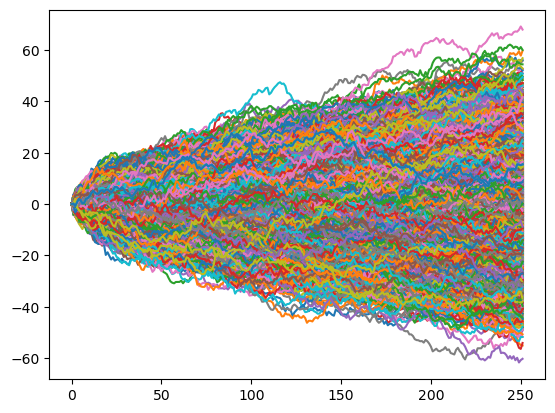

In [29]:
# Recursive way with loops
T=[]
k=251
n=10000

for i in range(n):
    B = [0]
    for i in range(k):
        B.append(B[-1]+np.random.normal(0,1))
    plt.plot(B)
    T.append(B[-1])
plt.plot(B)

print(np.mean(T))
print(np.var(T, ddof=1))

In [40]:
def quadratic_variation(Z):
    return np.cumsum(np.power(np.diff(Z, axis=0, prepend=0.), 2), axis=0)

In [45]:
# vectorized solution
def main():
    n = 1000
    k=50
    #t = []
    for i in range(n):
        Z = np.concatenate((np.zeros((n, 1)), np.random.normal(0, 1, (n, k)).cumsum(axis=1)), axis=1)
        #t.append(np.var(Z[:, -1], ddof=1))
    #print(np.mean(Z[:, -1]))
    #print(np.var(Z[:, -1], ddof=1))
    #plt.plot(Z[0])
    #plt.hist(t)
    #plt.plot(Z[:,:])
    plt.plot(quadratic_variation(Z[0]))
    plt.show()

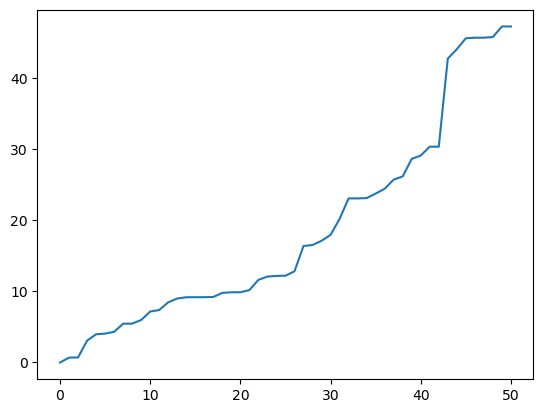

In [46]:
main()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def quadratic_variation(X):
    return np.cumsum(np.power(np.diff(X, axis=0, prepend=0.), 2), axis=0)

In [13]:
def main():
    n = 1000 # iteration number
    d = 10 # number of Brownian motion
    T = 1.
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = np.sqrt(dt) * np.random.normal(size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    #plt.plot(times, X)
    plt.plot(times, quadratic_variation(X))
    plt.show()

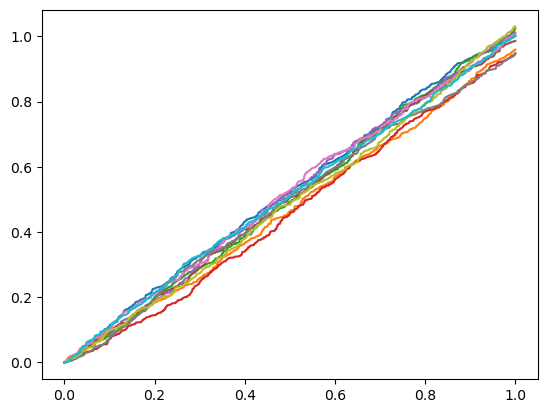

In [14]:
main()